In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
'tf:',tf.__version__, 'tf,keras:', tf.keras.__version__

('tf:', '2.4.0-rc0', 'tf,keras:', '2.4.0')

## TO DO LIST
* Load data (MNIST, Fashion-MNIST)
* Check shape
* Normalize (scale data range to 0..1)
* Separate train-valid and test data
* You may want to “figure” out the image data
* Build NN model by Sequential API
* Using “summary()” to summarize model / plot model

In [3]:
mnist = tf.keras.datasets.mnist
(x_train_all, y_train_all), (x_test, y_test) = mnist.load_data()

In [4]:
x_train_all.shape, x_train_all.dtype

((60000, 28, 28), dtype('uint8'))

In [5]:
x_valid, x_train = x_train_all[:5000] / 255., x_train_all[5000:] / 255.
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
x_test = x_test / 255.

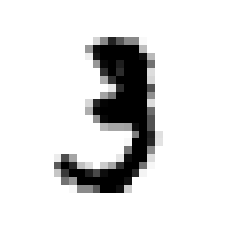

In [6]:
plt.imshow(x_train_all[10], cmap="binary")
plt.axis('off')
plt.show()

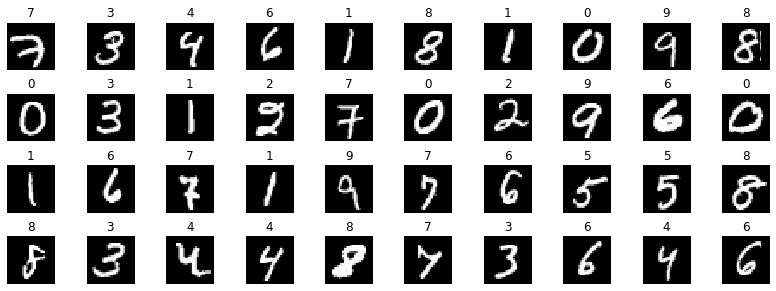

In [7]:
#class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names = list('0123456789')
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="gray", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [8]:
'''
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
'''

'\nmodel = tf.keras.models.Sequential()\nmodel.add(tf.keras.layers.Flatten(input_shape=[28, 28]))\nmodel.add(tf.keras.layers.Dense(300, activation="relu"))\nmodel.add(tf.keras.layers.Dense(100, activation="relu"))\nmodel.add(tf.keras.layers.Dense(10, activation="softmax"))\n'

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')])

In [10]:
model.layers

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
weights, biases = model.get_layer('dense_1').get_weights()
weights

array([[-0.08724416,  0.03149784,  0.05441359, ..., -0.00772114,
         0.11889119,  0.05243633],
       [ 0.10684239,  0.09126442, -0.08411931, ...,  0.01996963,
         0.0527531 ,  0.10671014],
       [ 0.08630951, -0.03157011,  0.01807015, ...,  0.11692814,
         0.08974396, -0.04631253],
       ...,
       [ 0.1076869 , -0.05518822,  0.0701082 , ...,  0.10731112,
         0.09045767,  0.08011656],
       [-0.07795636,  0.10828056,  0.03591954, ..., -0.11287595,
        -0.08410403,  0.02150813],
       [-0.10817217, -0.06067128, -0.09937021, ..., -0.07680859,
        -0.0111755 ,  0.04473151]], dtype=float32)

In [13]:
weights.shape

(300, 100)

In [14]:
biases.shape

(100,)

In [15]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.10846428, 0.10952737, 0.12384251, 0.07314079, 0.08621202,
        0.07136028, 0.15095086, 0.10032767, 0.13386205, 0.04231212]],
      dtype=float32)

In [16]:
model.predict(x_train[:1])

array([[0.10846429, 0.10952736, 0.12384251, 0.0731408 , 0.08621203,
        0.07136028, 0.15095086, 0.10032767, 0.13386205, 0.04231212]],
      dtype=float32)

In [17]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(loss=loss_fn,
              optimizer="sgd",
              metrics=["accuracy"])

In [18]:
history = model.fit(x_train, y_train, epochs=10,  validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 1s 587us/step - loss: 1.0037 - accuracy: 0.7379 - val_loss: 0.3049 - val_accuracy: 0.9164
Epoch 2/10
1719/1719 [==============================] - 1s 448us/step - loss: 0.3011 - accuracy: 0.9142 - val_loss: 0.2452 - val_accuracy: 0.9298
Epoch 3/10
1719/1719 [==============================] - 1s 448us/step - loss: 0.2394 - accuracy: 0.9310 - val_loss: 0.2010 - val_accuracy: 0.9442
Epoch 4/10
1719/1719 [==============================] - 1s 450us/step - loss: 0.2055 - accuracy: 0.9406 - val_loss: 0.1767 - val_accuracy: 0.9502
Epoch 5/10
1719/1719 [==============================] - 1s 452us/step - loss: 0.1747 - accuracy: 0.9498 - val_loss: 0.1596 - val_accuracy: 0.9572
Epoch 6/10
1719/1719 [==============================] - 1s 446us/step - loss: 0.1586 - accuracy: 0.9555 - val_loss: 0.1451 - val_accuracy: 0.9608
Epoch 7/10
1719/1719 [==============================] - 1s 448us/step - loss: 0.1401 - accuracy: 0.9605 - val_loss: 0.1379 -

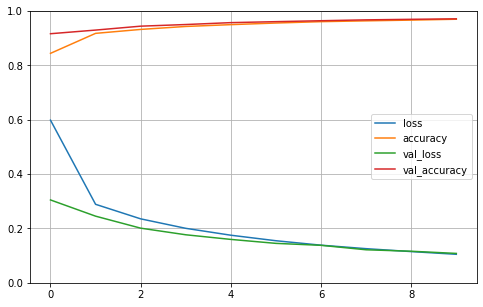

In [19]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 285us/step - loss: 0.1114 - accuracy: 0.9657


[0.11135821789503098, 0.9656999707221985]

In [21]:
x_new = x_test[:3]

In [ ]:
y_proba = model.predict(x_test)
y_proba.round(2)